# **Indian Water Quality Assesment**

#Overview

This project aimed to develop a predictive model for water quality assesment using various factors such as pH, temperature, taste, odor,'Temp', 'D.O. (mg/l)', 'PH','CONDUCTIVITY (µmhos/cm)', 'B.O.D. (mg/l)', 'NITRATENAN N+ NITRITENANN (mg/l)', 'FECAL COLIFORM (MPN/100ml)','TOTAL COLIFORM (MPN/100ml), The linear regression model built in this project achieved an accuracy of 78% in predicting the quality of water samples. This model has practical applications in the industry and can benefit both state and country.

Government can use the model to assess the quality of their river water of the state and make decisions about cleaning and processing. People can also make decisions when drinking water or using river water based on its predicted quality. However, it is important to validate the model's performance on new, unseen data to ensure its generalizability before implementing it in practical applications.

Furthermore, there may be additional factors that influence water quality beyond the scope of the factors considered in this project, which could be explored in future research. Overall, this project demonstrates the potential of machine learning and predictive modeling highlights the importance of understanding the underlying factors that influence water quality index

# The Dataset

The Dataset for water quality assesment was taken from kaggle datasets. The Water quality can be estimated from the composition of the water from variable locations with their station codes present as in dataset.The Location,state,temperature,pH,Conductivity,B.O.D, D.O,Nitrate, Total Colloform etc.Dataset was collected from govt. and is from 2003 to 2014.
Parameters - 'STATION CODE', 'LOCATIONS', 'STATE', 'Temp', 'D.O. (mg/l)', 'PH',
       'CONDUCTIVITY (µmhos/cm)', 'B.O.D. (mg/l)',
       'NITRATENAN N+ NITRITENANN (mg/l)', 'FECAL COLIFORM (MPN/100ml)',
       'TOTAL COLIFORM (MPN/100ml)
These parameters plays a vital role in checking WQI.

In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import probplot
from scipy.stats import zscore

In [ ]:
dataset=pd.read_csv('water_dataX.csv',encoding="ISO-8859-1")
dataset.fillna(0, inplace=True)
dataset.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


In [ ]:
dataset.dtypes

STATION CODE                        object
LOCATIONS                           object
STATE                               object
Temp                                object
D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (µmhos/cm)             object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
year                                 int64
dtype: object

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   STATION CODE                      1991 non-null   object
 1   LOCATIONS                         1991 non-null   object
 2   STATE                             1991 non-null   object
 3   Temp                              1991 non-null   object
 4   D.O. (mg/l)                       1991 non-null   object
 5   PH                                1991 non-null   object
 6   CONDUCTIVITY (µmhos/cm)           1991 non-null   object
 7   B.O.D. (mg/l)                     1991 non-null   object
 8   NITRATENAN N+ NITRITENANN (mg/l)  1991 non-null   object
 9   FECAL COLIFORM (MPN/100ml)        1991 non-null   object
 10  TOTAL COLIFORM (MPN/100ml)Mean    1991 non-null   object
 11  year                              1991 non-null   int64 
dtypes: int64(1), object(

In [ ]:
dataset.describe()

,year
count,1991.000000
mean,2010.038172
std,3.057333
min,2003.000000
25%,2008.000000
50%,2011.000000
75%,2013.000000
max,2014.000000


In [ ]:
#conversions
#converting all non nuerical values to NaN
dataset['Temp']=pd.to_numeric(dataset['Temp'],errors='coerce')
dataset['D.O. (mg/l)']=pd.to_numeric(dataset['D.O. (mg/l)'],errors='coerce')
dataset['PH']=pd.to_numeric(dataset['PH'],errors='coerce')
dataset['B.O.D. (mg/l)']=pd.to_numeric(dataset['B.O.D. (mg/l)'],errors='coerce')
dataset['NITRATENAN N+ NITRITENANN (mg/l)']=pd.to_numeric(dataset['NITRATENAN N+ NITRITENANN (mg/l)'],errors='coerce')
dataset['TOTAL COLIFORM (MPN/100ml)Mean']=pd.to_numeric(dataset['TOTAL COLIFORM (MPN/100ml)Mean'],errors='coerce')
dataset.dtypes

STATION CODE                         object
LOCATIONS                            object
STATE                                object
Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)              object
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)           object
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                  int64
dtype: object

In [ ]:
dataset.columns

Index(['STATION CODE', 'LOCATIONS', 'STATE', 'Temp', 'D.O. (mg/l)', 'PH',
       'CONDUCTIVITY (µmhos/cm)', 'B.O.D. (mg/l)',
       'NITRATENAN N+ NITRITENANN (mg/l)', 'FECAL COLIFORM (MPN/100ml)',
       'TOTAL COLIFORM (MPN/100ml)Mean', 'year'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.pairplot(dataset)

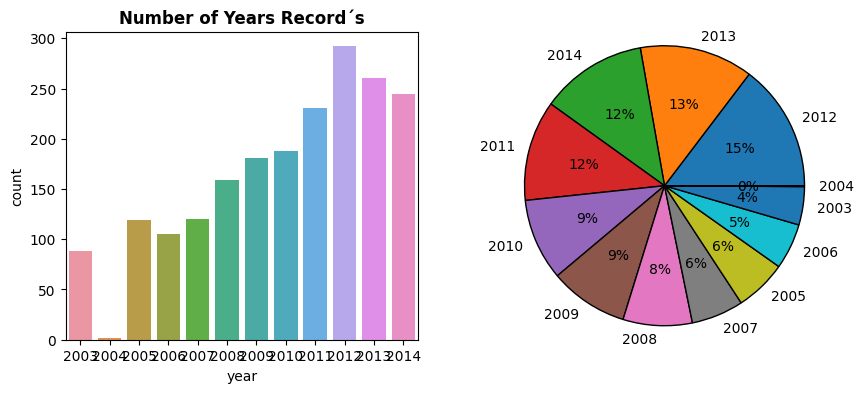

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.countplot(x="year",data = dataset)
plt.title("Number of Years Record´s", fontweight="bold")

plt.subplot(1,2,2)
plt.pie(dataset["year"].value_counts().values,
       labels=list(dataset["year"].value_counts().index),
        wedgeprops = {"ec": "k"},
       textprops = {"fontsize":10},
       autopct="%1.0f%%")
plt.axis("equal")
plt.show()

In [ ]:
dataset['year'].value_counts()

2012    292
2013    261
2014    245
2011    231
2010    188
2009    181
2008    159
2007    120
2005    119
2006    105
2003     88
2004      2
Name: year, dtype: int64

In [ ]:
import warnings
warnings.filterwarnings("ignore")
def boxplot(column):
    sns.boxplot(dataset["year"], dataset[column])
    plt.title("Boxplot of year vs" + column)


Skewness

Skewness is a statistical property that measures the degree of asymmetry in a probability distribution. A dataset is considered to be skewed if it is not symmetric, meaning that it is not equally distributed on both sides of its central value. Skewness can be positive or negative, indicating that the tail of the distribution is longer on the right or left side, respectively. The degree of skewness is measured by the skewness coefficient, which is a standardized measure that indicates the degree and direction of skewness. Skewness is an important characteristic of data that can have implications for statistical analysis and modeling.

There are two types of skewness: positive skewness and negative skewness. Positive skewness occurs when the tail of the distribution is longer on the right side, or in other words, there are more high values than low values. Negative skewness occurs when the tail of the distribution is longer on the left side, or in other words, there are more low values than high values.

In [ ]:
dataset.skew()

STATION CODE                              NaN
Temp                                -1.072404
D.O. (mg/l)                         -1.448236
PH                                  27.288784
CONDUCTIVITY (µmhos/cm)                   NaN
B.O.D. (mg/l)                       12.263954
NITRATENAN N+ NITRITENANN (mg/l)    13.122981
TOTAL COLIFORM (MPN/100ml)Mean      30.643214
year                                -0.593886
dtype: float64

<Axes: >

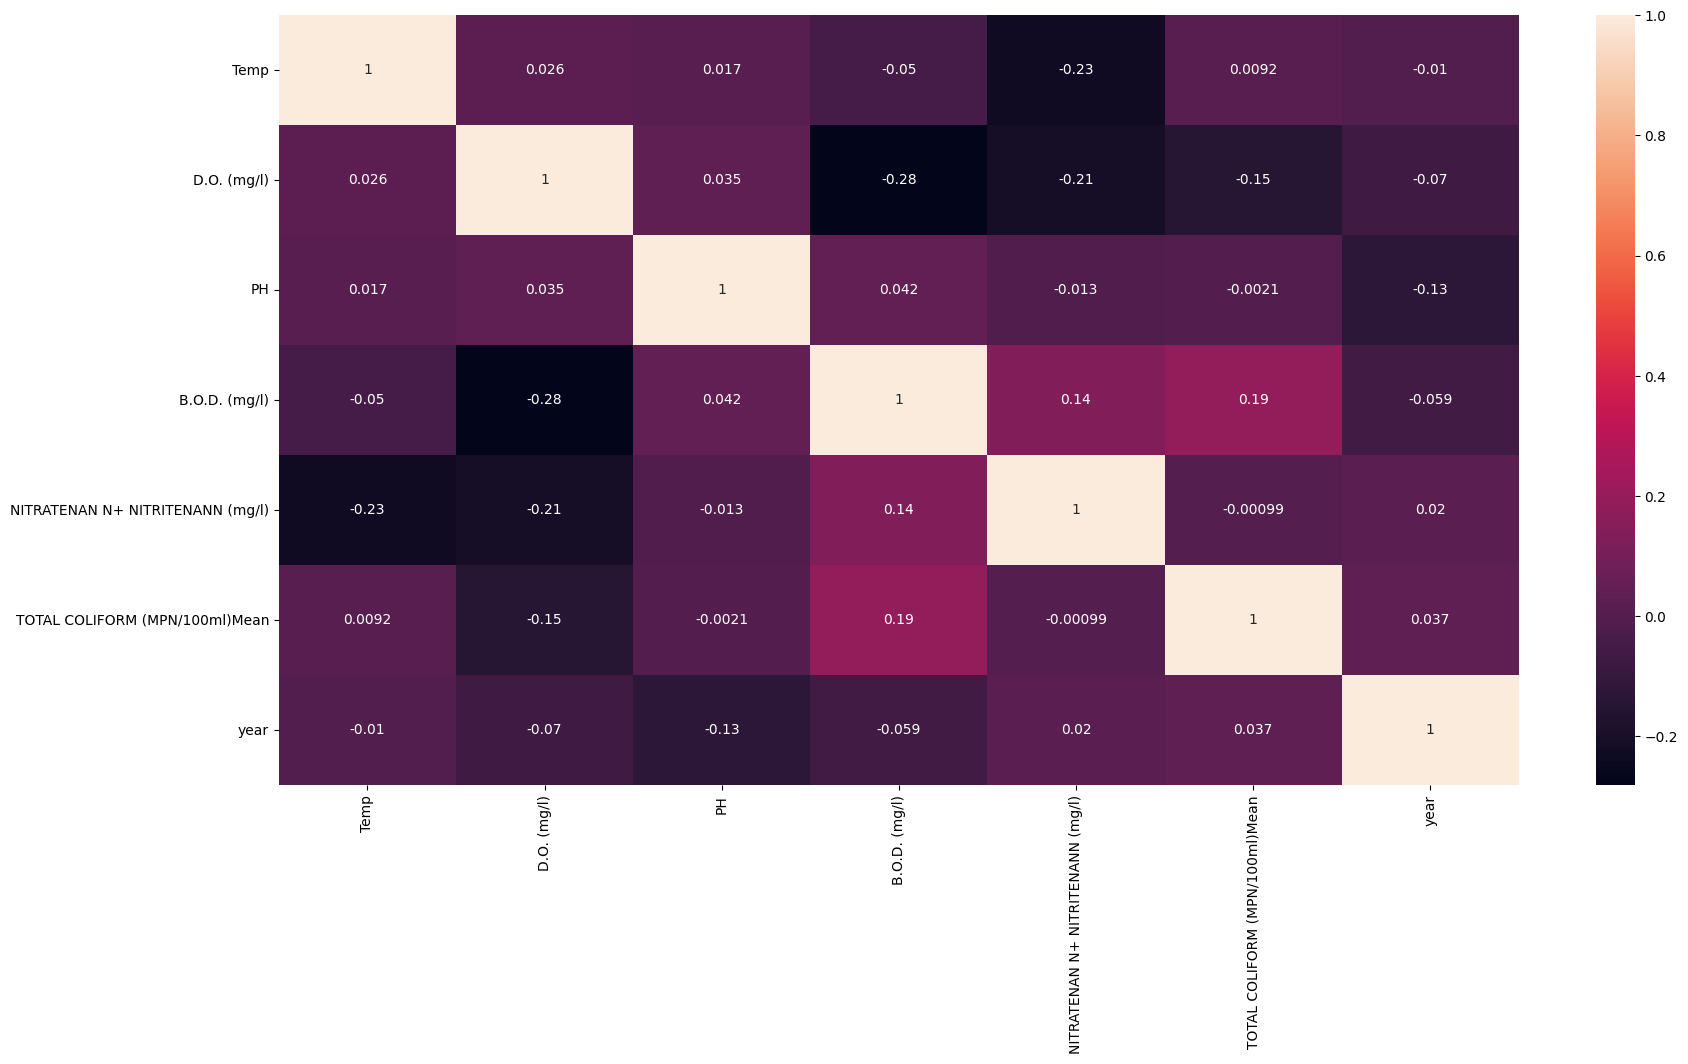

In [ ]:
corr = dataset.corr()
sns.heatmap(corr, annot=True)

<Axes: >

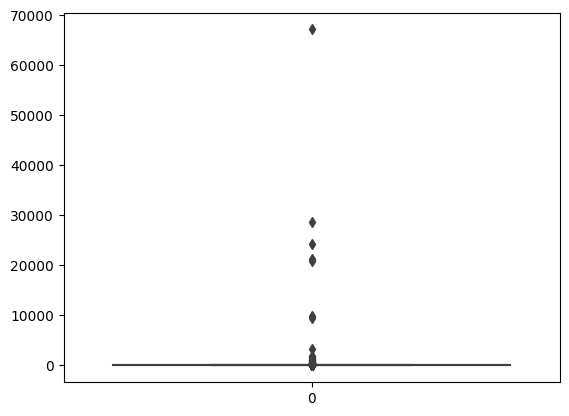

In [ ]:
sns.boxplot(dataset["PH"])

In [ ]:
pip install skimpy

  Using cached click-8.1.3-py3-none-any.whl (96 kB)
     ------------------------------------- 237.5/237.5 kB 40.6 kB/s eta 0:00:00
     --------------------------------------- 51.1/51.1 kB 96.7 kB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 8.0.4
    Uninstalling click-8.0.4:
      Successfully uninstalled click-8.0.4
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from skimpy import skim
skim(dataset)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1991   │ │ string      │ 11    │                                                          │
│ │ Number of columns │ 12     │ │ int32       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃ column_name        ┃ NA   ┃ NA %    ┃ mean    ┃ sd     ┃ p0      ┃ p25     ┃ p75     ┃ p100    ┃ hist      ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ year               │    0 │       0 │    2000 │    3.1 │    2000 │    2000 │    2000 │    2000 │  ▁▃▄▆██   │  │
│ └────────────────────┴──────┴─────────┴─────────┴────────┴─────────┴─────────┴─────────┴─────────┴───────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                           ┃ NA    ┃ NA %      ┃ words per row            ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ STATION CODE                          │     0 │         0 │                        1 │                2000 │  │
│ │ LOCATIONS                             │     0 │         0 │                        1 │                2000 │  │
│ │ STATE                                 │     0 │         0 │                        1 │                2000 │  │
│ │ Temp                                  │     0 │         0 │                        1 │                2000 │  │
│ │ D.O. (mg/l)                           │     0 │         0 │                        1 │                2000 │  │
│ │ PH                                    │     0 │         0 │                        1 │                2000 │  │
│ │ CONDUCTIVITY (µmhos/                  │     0 │         0 │                        1 │                2000 │  │
│ │ B.O.D. (mg/l)                         │     0 │         0 │                        1 │                2000 │  │
│ │ NITRATENAN N+ NITRIT                  │     0 │         0 │                        1 │                2000 │  │
│ │ FECAL COLIFORM (MPN/                  │     0 │         0 │                        1 │                2000 │  │
│ │ TOTAL COLIFORM (MPN/                  │     0 │         0 │                        1 │                2000 │  │
│ └───────────────────────────────────────┴───────┴───────────┴──────────────────────────┴─────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [ ]:
#initialization
start=2
end=1779
station=dataset.iloc [start:end ,0]
location=dataset.iloc [start:end ,1]
state=dataset.iloc [start:end ,2]
do= dataset.iloc [start:end ,4].astype(np.float64)
value=0
ph = dataset.iloc[ start:end,5]  
co = dataset.iloc [start:end ,6].astype(np.float64)   
  
year=dataset.iloc[start:end,11]
tc=dataset.iloc [2:end ,10].astype(np.float64)


bod = dataset.iloc [start:end ,7].astype(np.float64)
na= dataset.iloc [start:end ,8].astype(np.float64)
na.dtype

dtype('float64')

In [ ]:
data=pd.concat([station,location,state,do,ph,co,bod,na,tc,year],axis=1)
data. columns = ['station','location','state','do','ph','co','bod','na','tc','year']

In [ ]:
#calulation of Ph
data['npH']=data.ph.apply(lambda x: (100 if (8.5>=x>=7)  
                                 else(80 if  (8.6>=x>=8.5) or (6.9>=x>=6.8) 
                                      else(60 if (8.8>=x>=8.6) or (6.8>=x>=6.7) 
                                          else(40 if (9>=x>=8.8) or (6.7>=x>=6.5)
                                              else 0)))))

In [ ]:
#calculation of dissolved oxygen
data['ndo']=data.do.apply(lambda x:(100 if (x>=6)  
                                 else(80 if  (6>=x>=5.1) 
                                      else(60 if (5>=x>=4.1)
                                          else(40 if (4>=x>=3) 
                                              else 0)))))

In [ ]:
#calculation of total coliform
data['nco']=data.tc.apply(lambda x:(100 if (5>=x>=0)  
                                 else(80 if  (50>=x>=5) 
                                      else(60 if (500>=x>=50)
                                          else(40 if (10000>=x>=500) 
                                              else 0)))))

In [ ]:
#calc of B.D.O
data['nbdo']=data.bod.apply(lambda x:(100 if (3>=x>=0)  
                                 else(80 if  (6>=x>=3) 
                                      else(60 if (80>=x>=6)
                                          else(40 if (125>=x>=80) 
                                              else 0)))))

In [ ]:
#calculation of electrical conductivity
data['nec']=data.co.apply(lambda x:(100 if (75>=x>=0)  
                                 else(80 if  (150>=x>=75) 
                                      else(60 if (225>=x>=150)
                                          else(40 if (300>=x>=225) 
                                              else 0)))))

In [ ]:
#Calulation of nitrate
data['nna']=data.na.apply(lambda x:(100 if (20>=x>=0)  
                                 else(80 if  (50>=x>=20) 
                                      else(60 if (100>=x>=50)
                                          else(40 if (200>=x>=100) 
                                              else 0)))))

data.head()
data.dtypes

station      object
location     object
state        object
do          float64
ph          float64
co          float64
bod         float64
na          float64
tc          float64
year          int64
npH           int64
ndo           int64
nco           int64
nbdo          int64
nec           int64
nna           int64
dtype: object

In [ ]:
data['wph']=data.npH * 0.165
data['wdo']=data.ndo * 0.281
data['wbdo']=data.nbdo * 0.234
data['wec']=data.nec* 0.009
data['wna']=data.nna * 0.028
data['wco']=data.nco * 0.281
data['wqi']=data.wph+data.wdo+data.wbdo+data.wec+data.wna+data.wco 
data

,station,location,state,do,ph,co,bod,na,tc,year,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
2,1475,ZUARI AT PANCHAWADI,GOA,6.300,6.900,179.0,1.7,0.1,5330.0,2014,...,100,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,5.800,6.900,64.0,3.8,0.5,8443.0,2014,...,80,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,5.800,7.300,83.0,1.9,0.4,5500.0,2014,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
5,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,5.500,7.400,81.0,1.5,0.1,4049.0,2014,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
6,1476,"MANDOVI AT TONCA, MARCELA, GOA",GOA,6.100,6.700,308.0,1.4,0.3,5672.0,2014,...,100,0,100,9.9,28.10,23.40,0.00,2.8,11.24,75.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1774,1428,"KHARKHLA NEAR SUTNGA KHLIERIAT,JAINTIA HILLS D...",NAN,4.600,3.000,350.0,6.2,2.2,49.0,2006,...,60,0,100,0.0,16.86,14.04,0.00,2.8,22.48,56.18
1775,1631,"MYNTDU RIVER JOWAI, MEGHALAYA",NAN,8.800,7.000,172.0,1.6,5.0,2800.0,2006,...,100,60,100,16.5,28.10,23.40,0.54,2.8,11.24,82.58
1776,1632,"GANOL RIVER TURA, MEGHALAYA",NAN,10.000,7.100,150.0,1.0,4.0,350.0,2006,...,100,80,100,16.5,28.10,23.40,0.72,2.8,16.86,88.38
1777,1633,"SIMSANG RIVER WILLIAMNAGAR, MEGHALAYA",NAN,9.000,7.300,158.0,1.8,7.2,280.0,2006,...,100,60,100,16.5,28.10,23.40,0.54,2.8,16.86,88.20


In [ ]:
#calculation overall wqi for each year
ag=data.groupby('year')['wqi'].mean()
ag.head()

year
2006    71.308824
2007    72.549000
2008    72.570943
2009    74.085193
2010    74.648723
Name: wqi, dtype: float64

In [ ]:
data=ag.reset_index(level=0,inplace=False)
data

,year,wqi
0,2006,71.308824
1,2007,72.549000
2,2008,72.570943
3,2009,74.085193
4,2010,74.648723
5,2011,75.647013
6,2012,78.969041
7,2013,75.009425
8,2014,76.879588


In [ ]:
#visualizing the filttered data

year=data['year'].values
AQI=data['wqi'].values
data['wqi']=pd.to_numeric(data['wqi'],errors='coerce')
data['year']=pd.to_numeric(data['year'],errors='coerce')

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(year,AQI, color='red')
plt.show()
data

<Figure size 2000x1000 with 0 Axes>

,year,wqi
0,2006,71.308824
1,2007,72.549000
2,2008,72.570943
3,2009,74.085193
4,2010,74.648723
5,2011,75.647013
6,2012,78.969041
7,2013,75.009425
8,2014,76.879588


In [ ]:
data = data[np.isfinite(data['wqi'])]
data.head()

,year,wqi
0,2006,71.308824
1,2007,72.549000
2,2008,72.570943
3,2009,74.085193
4,2010,74.648723


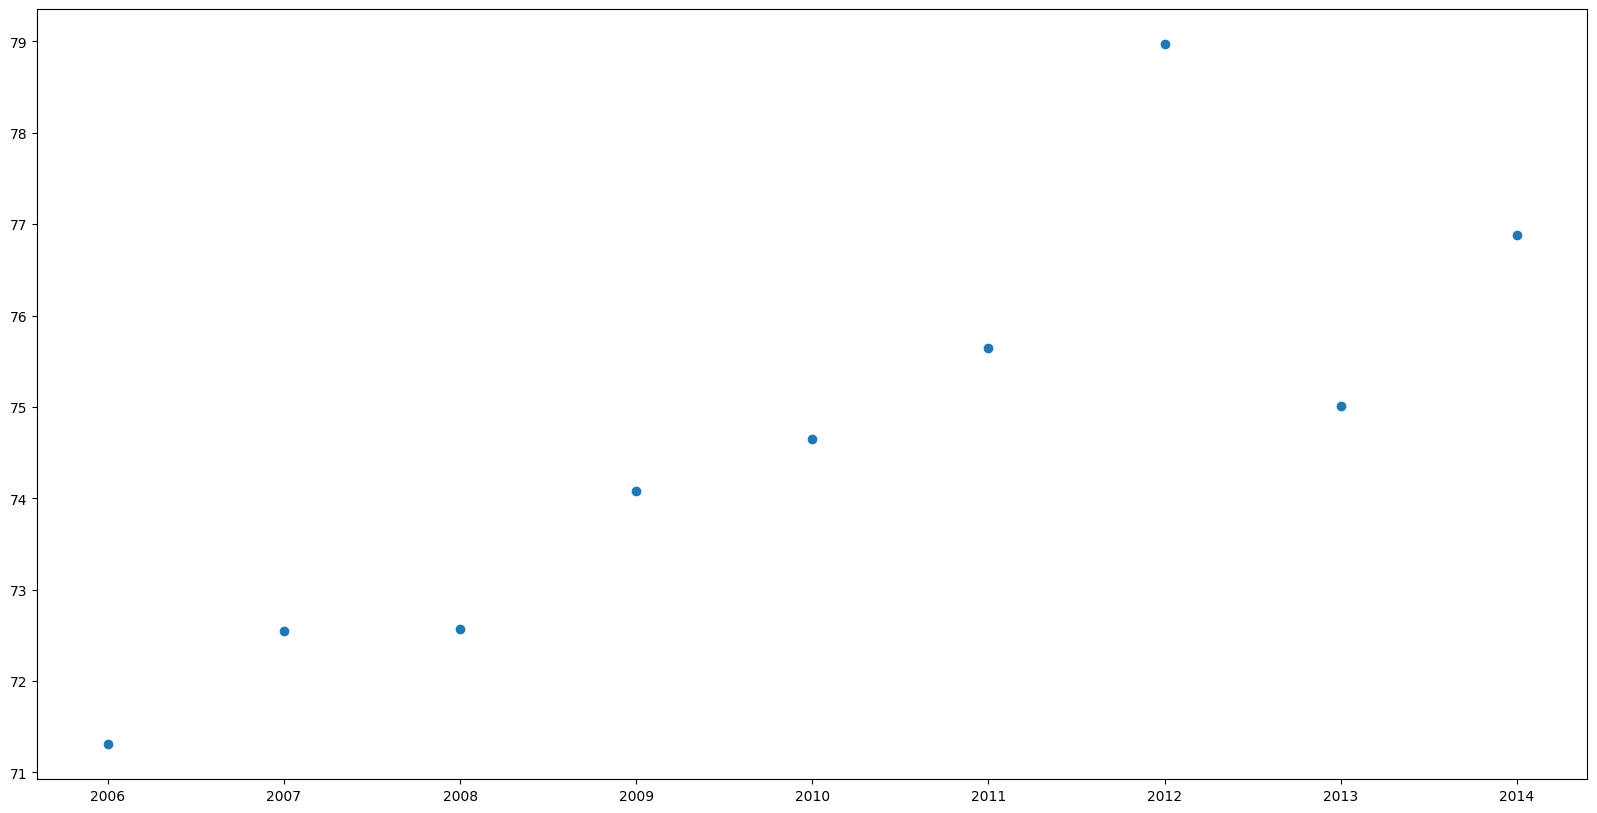

In [ ]:
#scatter plot of data points
cols =['year']
y = data['wqi']
x=data[cols]

plt.scatter(x,y)
plt.show()

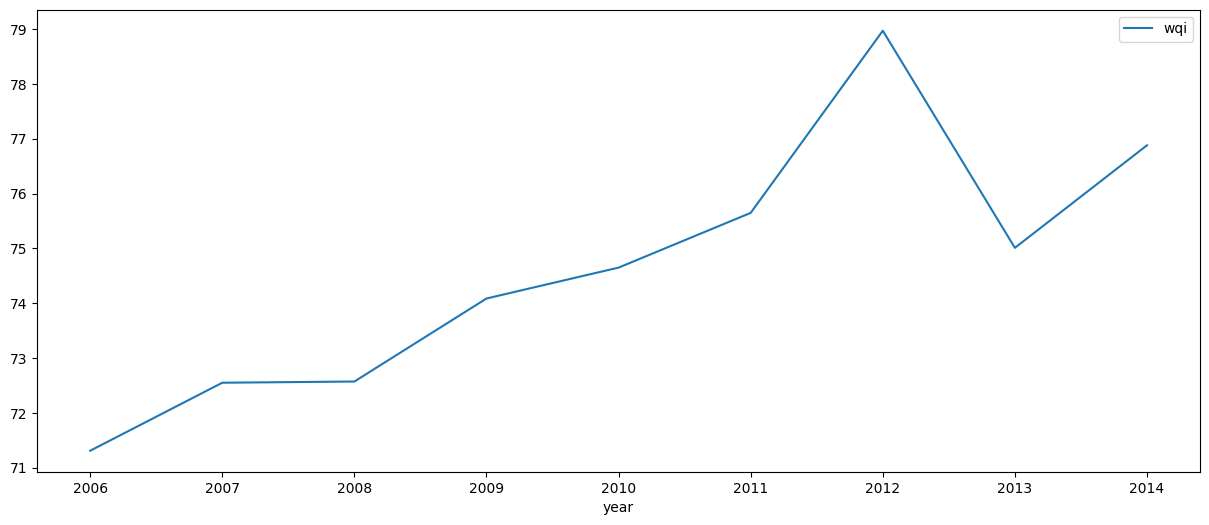

In [ ]:
import matplotlib.pyplot as plt
data=data.set_index('year')
data.plot(figsize=(15,6))
plt.show()

In [ ]:
from sklearn import neighbors,datasets
data=data.reset_index(level=0,inplace=False)
data

,year,wqi
0,2006,71.308824
1,2007,72.549000
2,2008,72.570943
3,2009,74.085193
4,2010,74.648723
5,2011,75.647013
6,2012,78.969041
7,2013,75.009425
8,2014,76.879588


In [ ]:
#using linear regression to predict
from sklearn import linear_model
from sklearn.model_selection import train_test_split
cols =['year']
y = data['wqi']
x=data[cols]
reg=linear_model.LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
a=reg.predict(x_test)
a

array([73.86206246, 74.59948715])

In [ ]:
y_test

3    74.085193
4    74.648723
Name: wqi, dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error
print('mse:%.2f'%mean_squared_error(y_test,a))

mse:0.03


In [ ]:
dt = pd.DataFrame({'Actual': y_test, 'Predicted': a}) 
#using gradient descent to optimize it further
x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x]
x

array([[ 1.        , -1.46059349],
       [ 1.        , -1.09544512],
       [ 1.        , -0.73029674],
       [ 1.        , -0.36514837],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.36514837],
       [ 1.        ,  0.73029674],
       [ 1.        ,  1.09544512],
       [ 1.        ,  1.46059349]])

In [ ]:
alpha = 0.1 #Step size
iterations = 3000 #No. of iterations
m = y.size #No. of data points
np.random.seed(4) #Setting the seed
theta = np.random.rand(2) #Picking some random values to start with

def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs

past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

#Print the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 74.63, 2.01


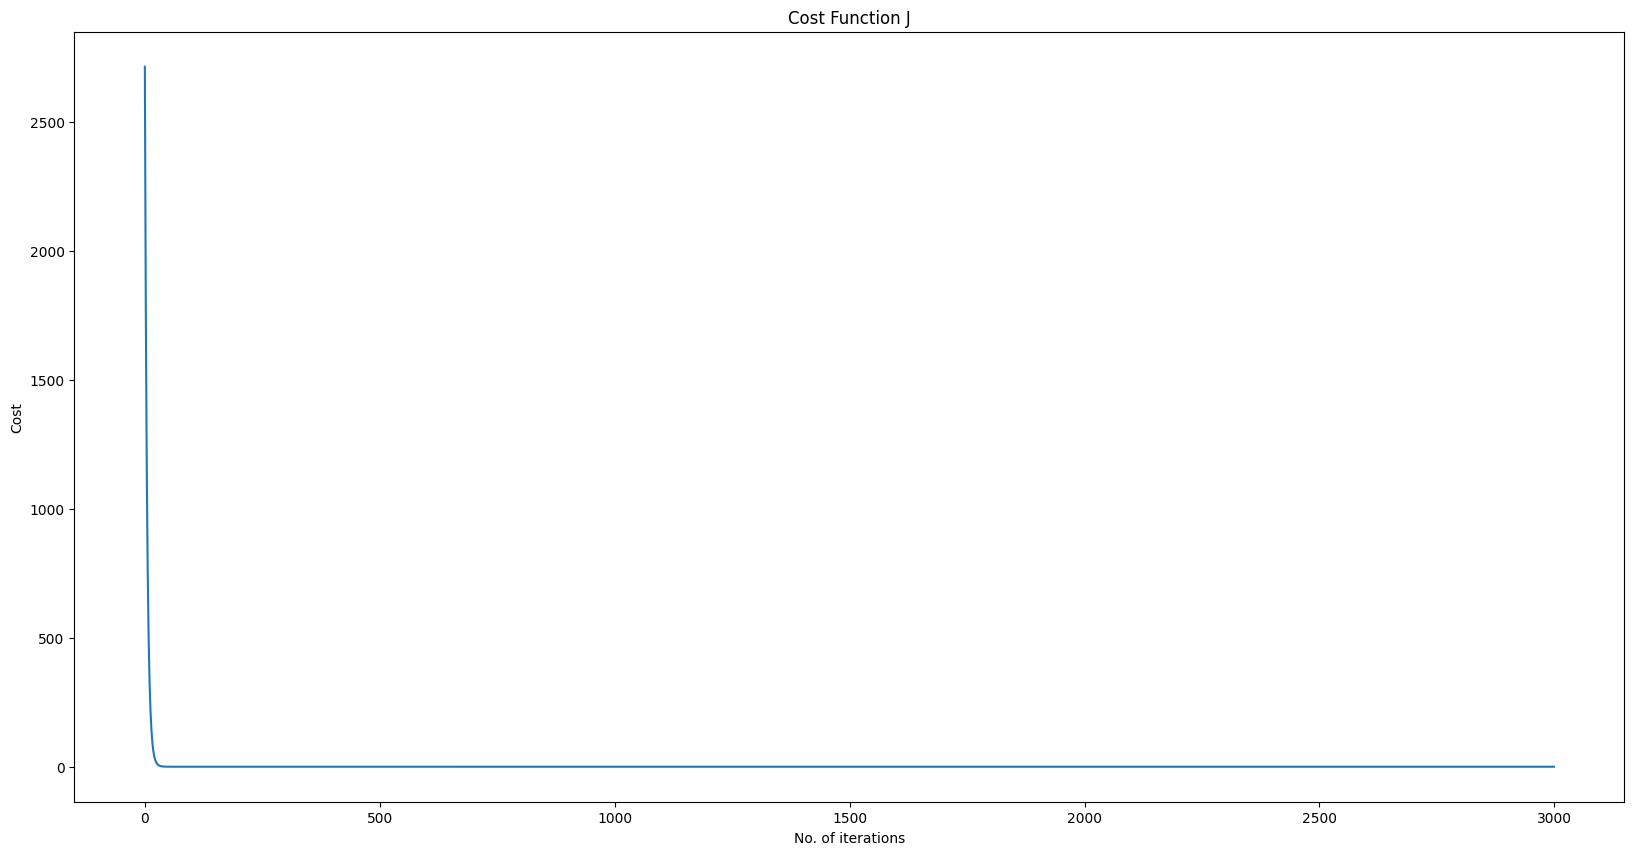

In [ ]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

In [ ]:
#prediction of january(2013-2015) across india
import numpy as np
newB=[74.76, 2.13]

def rmse(y,y_pred):
    rmse= np.sqrt(sum(y-y_pred))
    return rmse
   

y_pred=x.dot(newB)

dt = pd.DataFrame({'Actual': y, 'Predicted': y_pred})  
dt=pd.concat([data, dt], axis=1)
dt

,year,wqi,Actual,Predicted
0,2006,71.308824,71.308824,71.648936
1,2007,72.549000,72.549000,72.426702
2,2008,72.570943,72.570943,73.204468
3,2009,74.085193,74.085193,73.982234
4,2010,74.648723,74.648723,74.760000
5,2011,75.647013,75.647013,75.537766
6,2012,78.969041,78.969041,76.315532
7,2013,75.009425,75.009425,77.093298
8,2014,76.879588,76.879588,77.871064


In [ ]:
#testing the accuracy of the model

from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y,y_pred)))

1.1987755149740729


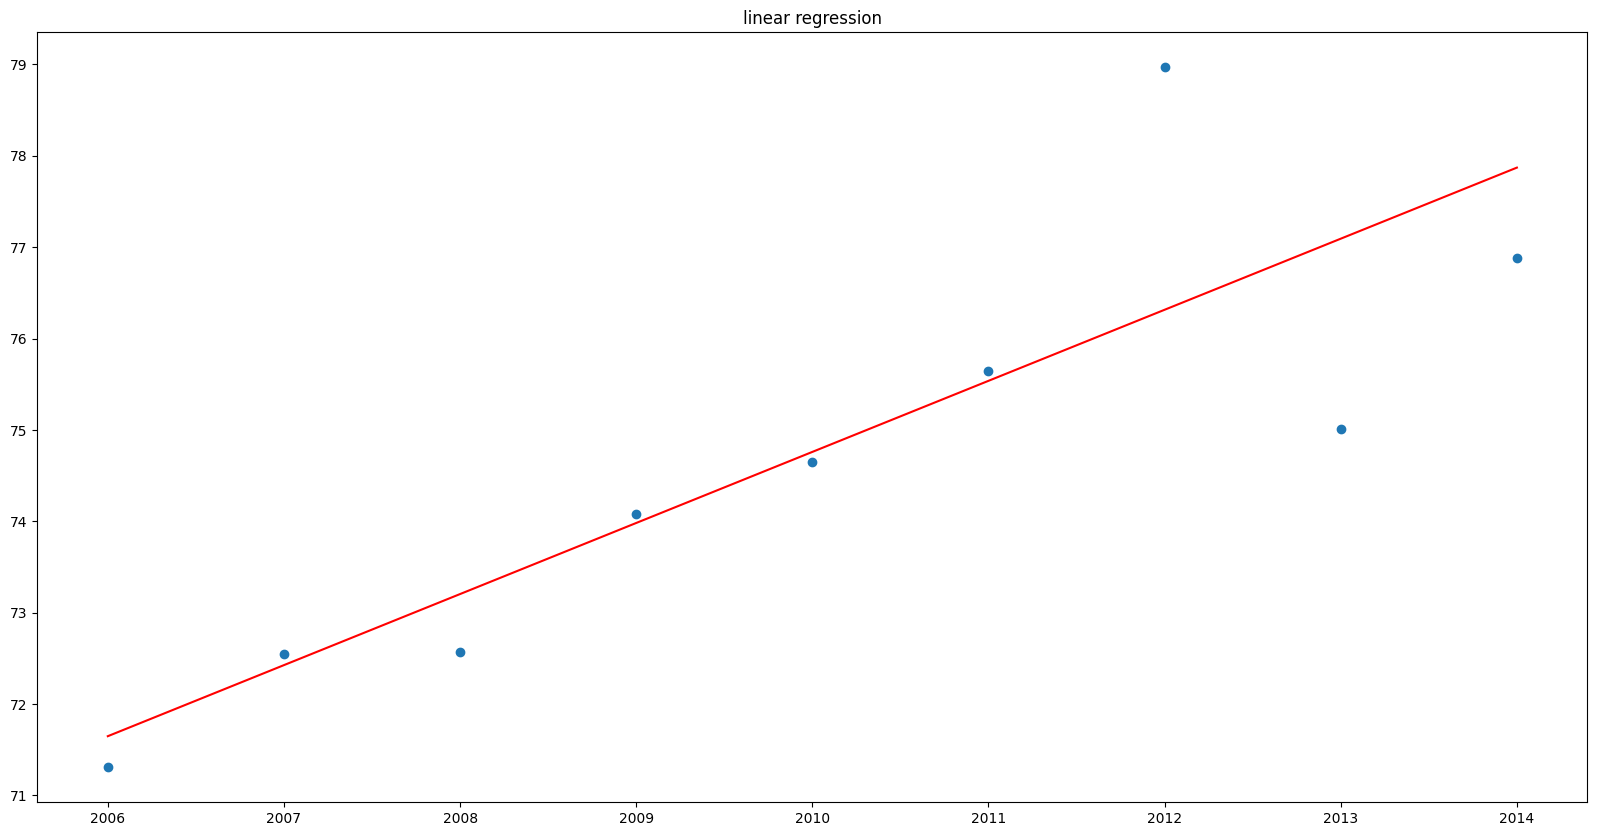

In [ ]:
#plotting the actual and predicted results
x_axis=dt.year
y_axis=dt.Actual
y1_axis=dt.Predicted
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,y1_axis,color='r')
plt.title("linear regression")

plt.show()

In [ ]:
#Taking the avg of the yearly water quality index and grouping it yearly
yearly = data.groupby('year')['wqi'].mean()

In [ ]:
yearly

year
2006    71.308824
2007    72.549000
2008    72.570943
2009    74.085193
2010    74.648723
2011    75.647013
2012    78.969041
2013    75.009425
2014    76.879588
Name: wqi, dtype: float64

In [ ]:
dataset['CONDUCTIVITY (µmhos/cm)']=pd.to_numeric(dataset['CONDUCTIVITY (µmhos/cm)'],errors='coerce')

In [ ]:
dataset.isna()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1986,False,False,False,True,False,False,False,False,False,False,False,False
1987,False,False,False,False,False,False,False,False,False,False,False,False
1988,False,False,False,False,False,False,False,False,True,False,False,False
1989,False,False,False,False,False,False,False,False,True,False,False,False


In [ ]:
data = data.dropna()
data.isna()

,year,wqi
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False


In [ ]:
datax = dataset.dropna()
datax.isna()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1981,False,False,False,False,False,False,False,False,False,False,False,False
1982,False,False,False,False,False,False,False,False,False,False,False,False
1984,False,False,False,False,False,False,False,False,False,False,False,False
1985,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
dataset.tail()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,NaN,7.9,738.0,7.2,2.7,0.518,0.518,202.0,2003
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.0,7.5,585.0,6.3,2.6,0.155,0.155,315.0,2003
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.0,7.6,98.0,6.2,1.2,NaN,NAN,570.0,2003
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.0,7.7,91.0,6.5,1.3,NaN,NAN,562.0,2003
1990,1726,"CHANDRAPUR, AGARTALA D/S OF HAORA RIVER, TRIPURA",NAN,29.0,7.6,110.0,5.7,1.1,NaN,NAN,546.0,2003


In [ ]:
yearly_wqi = yearly.reset_index(level=0,inplace=False)
yearly_wqi

,year,wqi
0,2006,71.308824
1,2007,72.549000
2,2008,72.570943
3,2009,74.085193
4,2010,74.648723
5,2011,75.647013
6,2012,78.969041
7,2013,75.009425
8,2014,76.879588


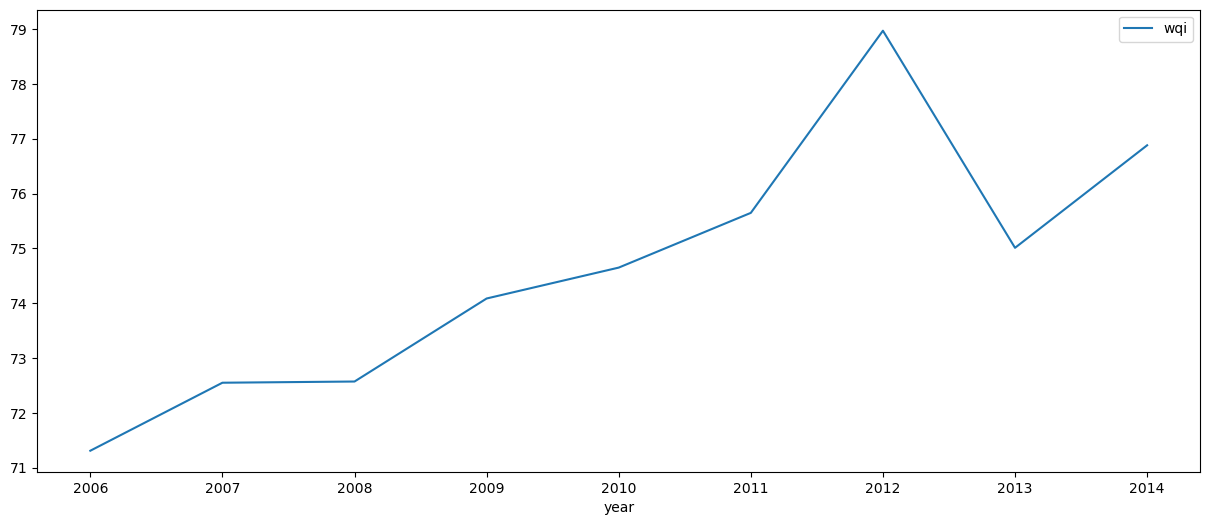

In [ ]:
#Data Visualisation Here
import matplotlib.pyplot as plt
yearly_wqi=yearly_wqi.set_index('year')
yearly_wqi.plot(figsize=(15,6))
plt.show()

C:\Users\SAURABH\AppData\Local\Temp\ipykernel_9832\3363775319.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


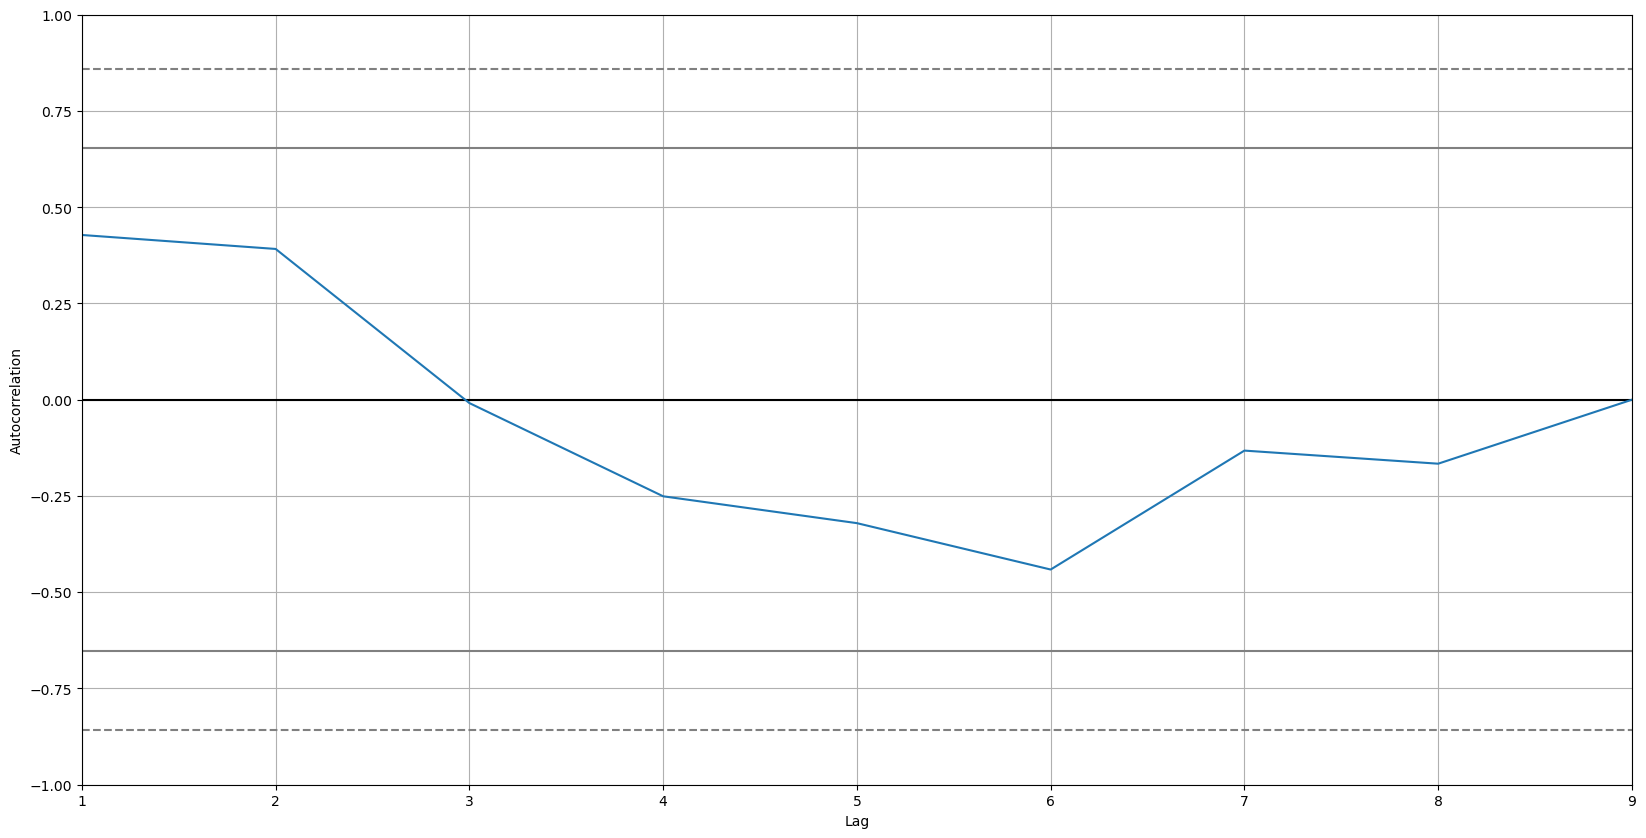

In [ ]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(yearly_wqi)
pyplot.show()

In [ ]:
series = yearly_wqi
###Training a Rolling forecast ARIMA Model and Evaluating the results
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

C:\Users\SAURABH\AppData\Local\Temp\ipykernel_9832\1319517901.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [ ]:
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(X, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

C:\Users\SAURABH\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


predicted=77.387763, expected=75.647013
predicted=77.387763, expected=78.969041
predicted=77.387763, expected=75.009425
predicted=77.387763, expected=76.879588


Test RMSE: 1.692


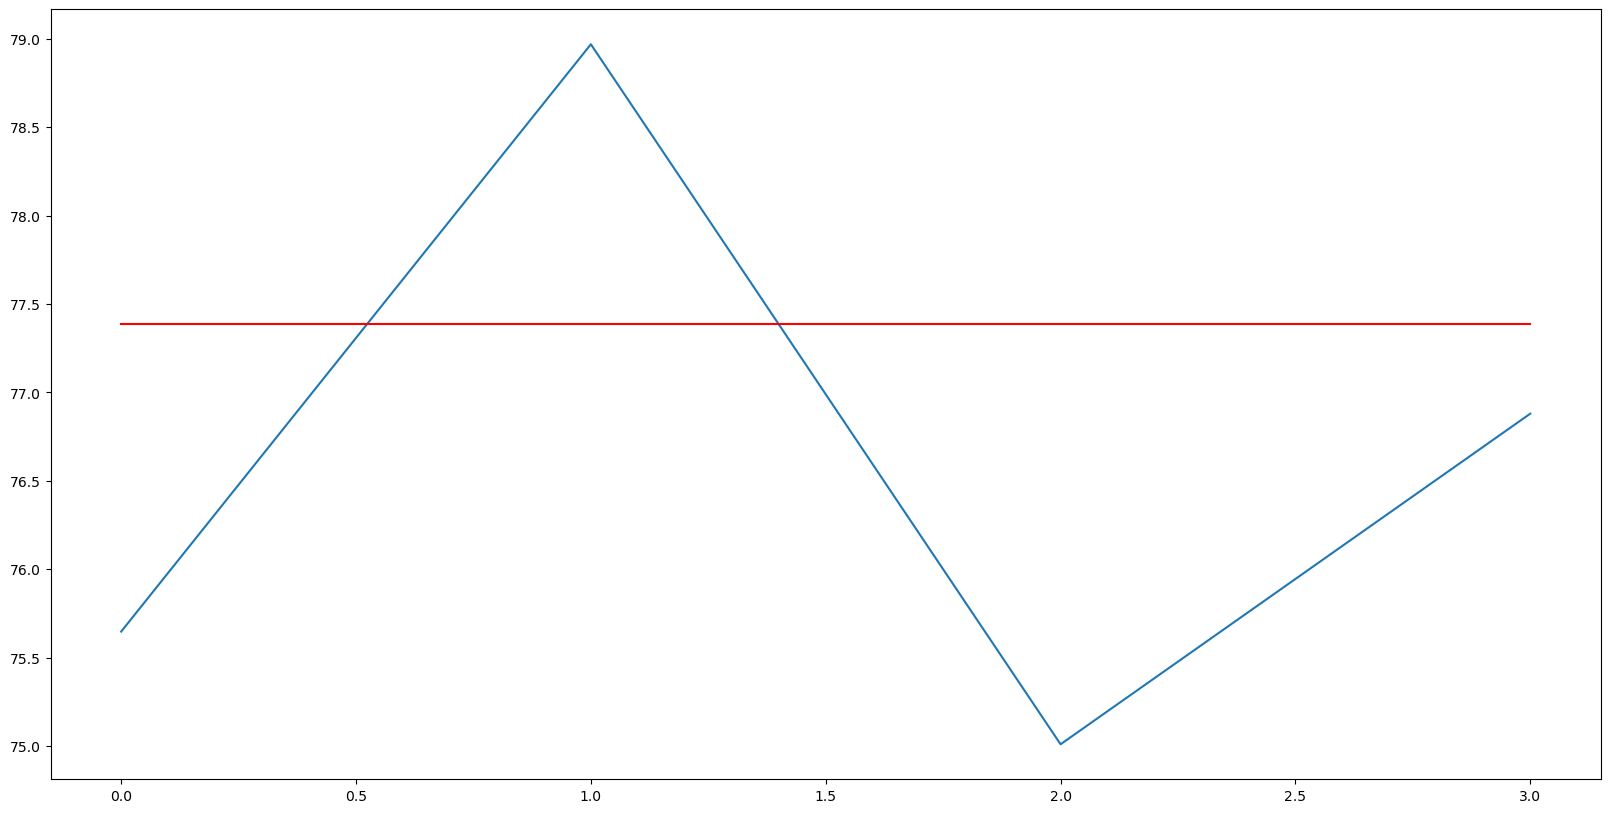

In [ ]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

C:\Users\SAURABH\AppData\Local\Temp\ipykernel_9832\2938392194.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
C:\Users\SAURABH\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\SAURABH\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\SAURABH\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\SAURABH\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregress

                               SARIMAX Results                                
Dep. Variable:                    wqi   No. Observations:                    9
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 -15.922
Date:                Sun, 21 May 2023   AIC                             43.843
Time:                        21:04:12   BIC                             44.320
Sample:                             0   HQIC                            40.629
                                  - 9                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4067      4.121     -0.099      0.921      -8.483       7.670
ar.L2          0.0461      6.424      0.007      0.994     -12.545      12.637
ar.L3          0.3833      4.711      0.081      0.9

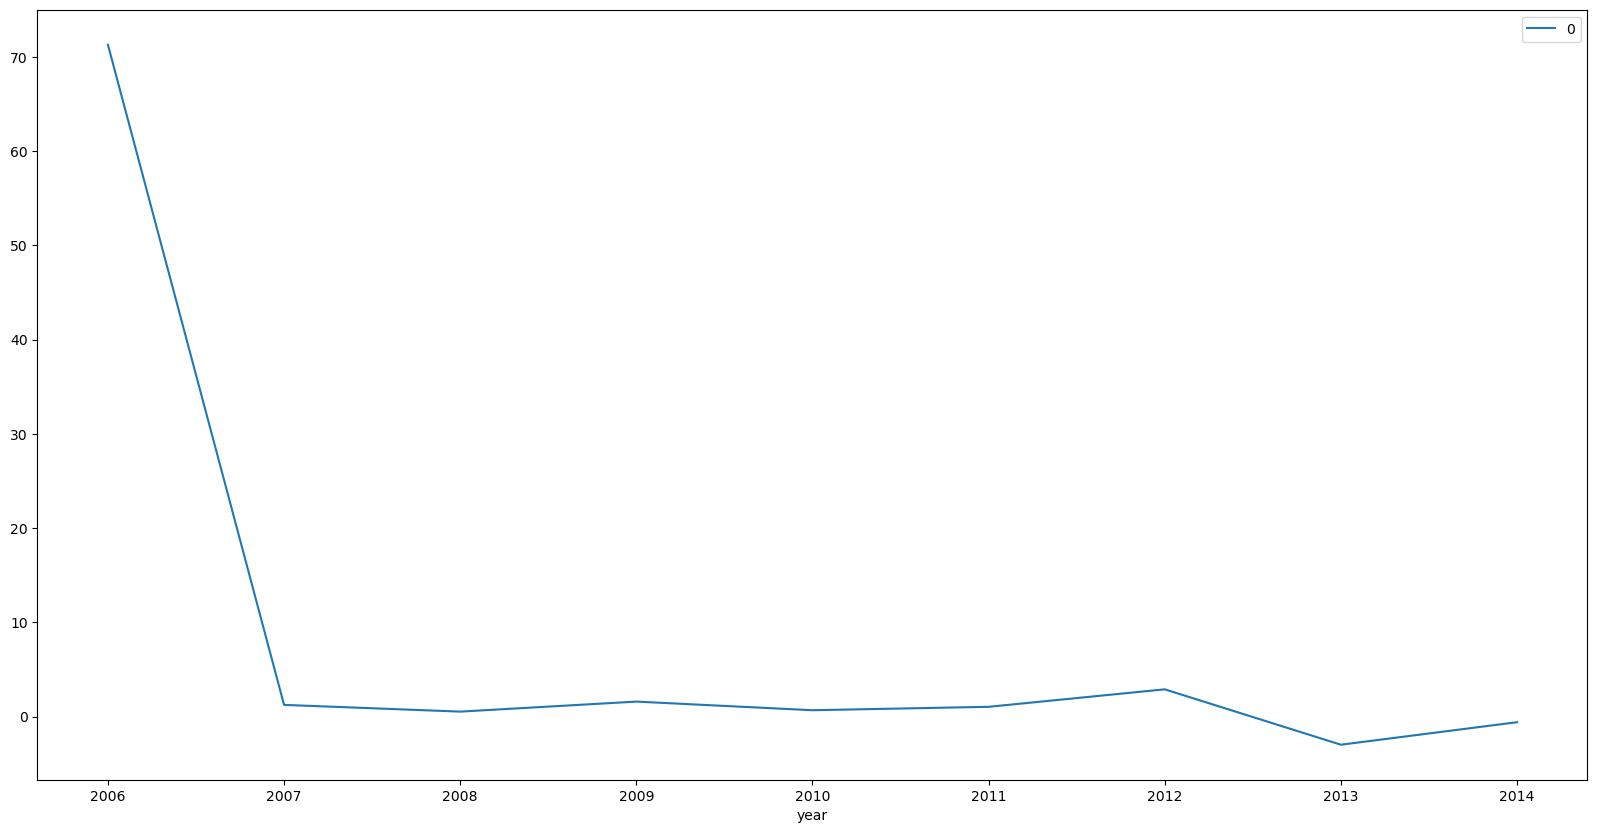

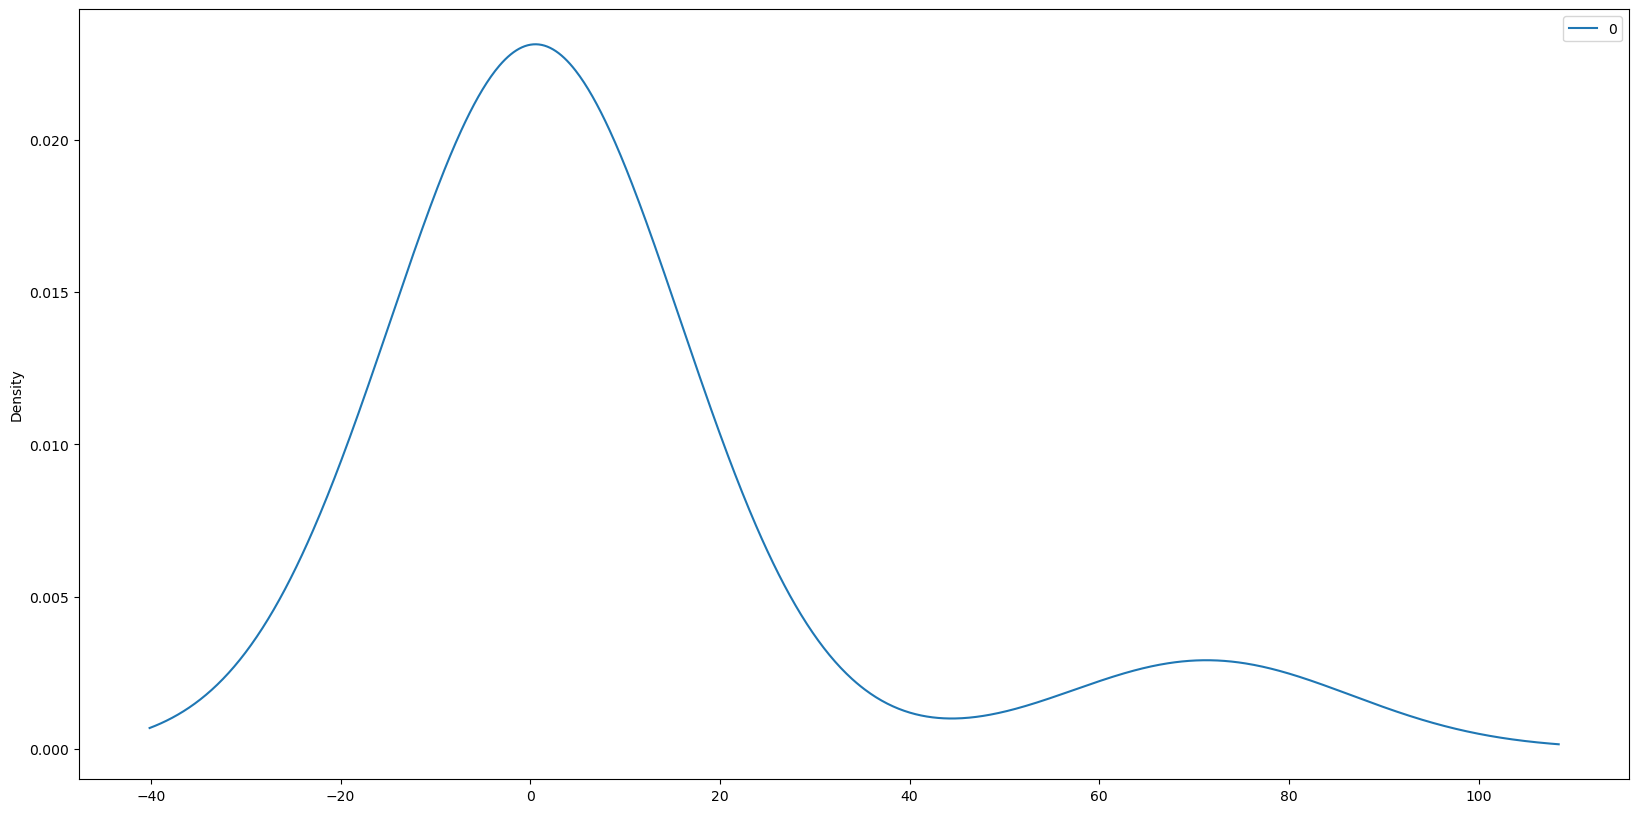

               0
count   9.000000
mean    8.409210
std    23.643250
min    -2.987205
25%     0.526710
50%     1.036346
75%     1.589489
max    71.308824


In [ ]:
###Training an ARIMA Model and Residual error plot
# fit an ARIMA model and plot residual errors
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [ ]:
# Replacing string NAN values with actual NAN value (np.nan)
def convert_to_nan(dataset):
    n_col = dataset.shape[1]
    for index in range(n_col):
        dataset.iloc[:, index]  = dataset.iloc[:, index].replace("NAN", np.nan)
    return dataset

df = convert_to_nan(dataset)

In [ ]:
# Checking for missing values
df.isnull().sum().sort_values()

year                                  0
PH                                    8
CONDUCTIVITY (µmhos/cm)              25
D.O. (mg/l)                          31
B.O.D. (mg/l)                        43
Temp                                 92
STATION CODE                        122
TOTAL COLIFORM (MPN/100ml)Mean      132
LOCATIONS                           184
NITRATENAN N+ NITRITENANN (mg/l)    225
FECAL COLIFORM (MPN/100ml)          303
STATE                               761
dtype: int64

In [ ]:
# Replacing NULL values with median of column
# Selecting numeric data
df_num = df.select_dtypes(exclude="object")
df_num_col = df_num.columns
imputer = SimpleImputer(strategy="median")

df_num = imputer.fit_transform(df_num)
df_num = pd.DataFrame(df_num, columns=df_num_col)

In [ ]:
# Filling Categorical missing values
df_cat = df.select_dtypes(include="object")
df_cat.isnull().sum()

STATION CODE                  122
LOCATIONS                     184
STATE                         761
CONDUCTIVITY (µmhos/cm)        25
FECAL COLIFORM (MPN/100ml)    303
dtype: int64

In [ ]:
df.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NaN,0.1,11,27.0,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2.0,0.2,4953,8391.0,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500.0,2014


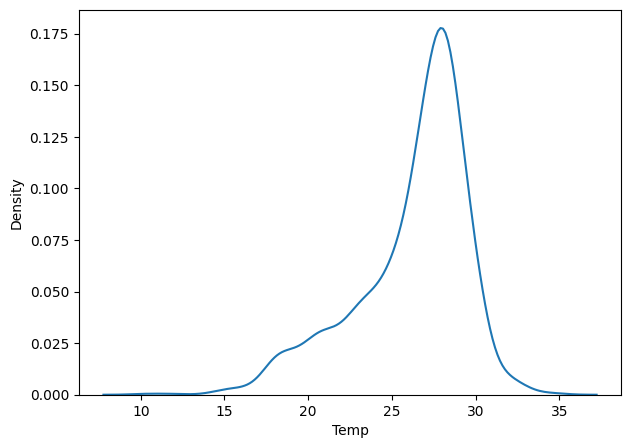

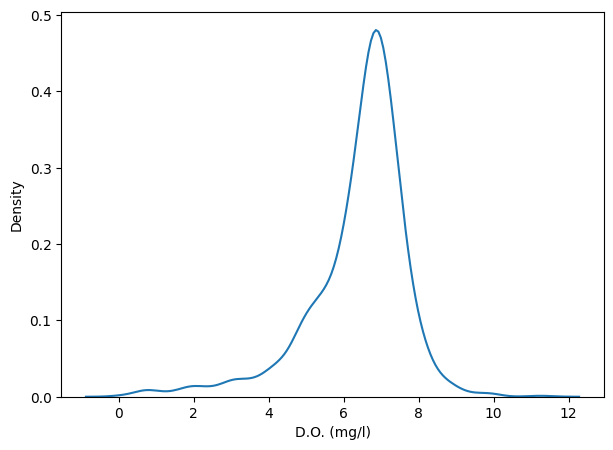

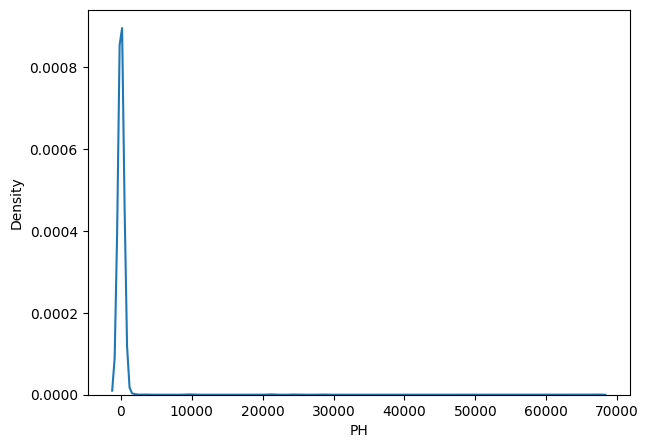

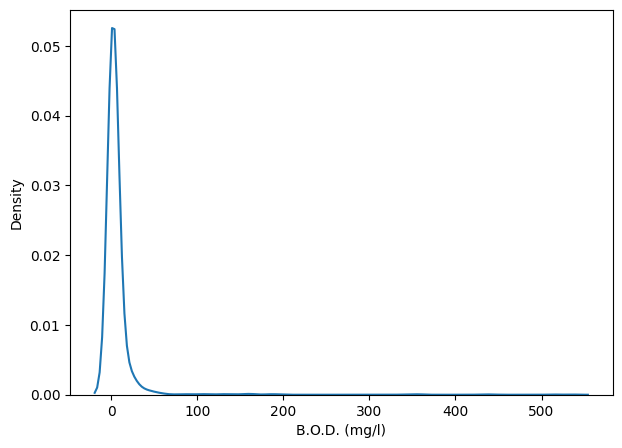

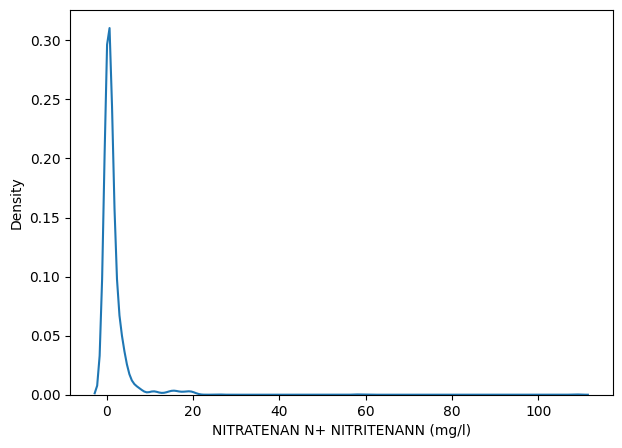

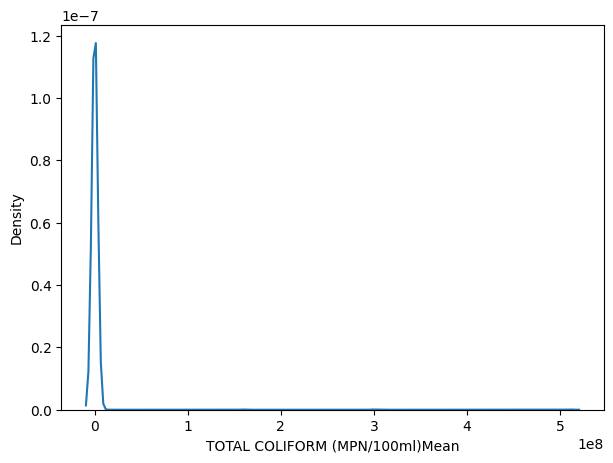

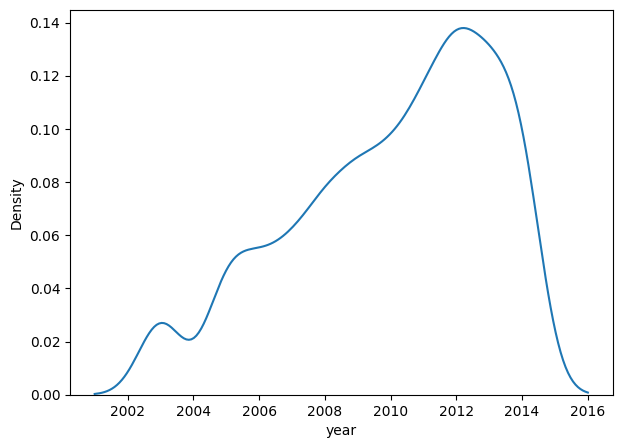

In [ ]:
# PLotting PDFs of all the numeric attributes in the dataset

df_num_final = df.select_dtypes(exclude="object")

def plot_kde(df):
    n_col = df.shape[1]
    for index in range(n_col):
        col_index = df.iloc[:, index]
        fig, ax = plt.subplots(1,1, figsize=(7, 5))
        sns.kdeplot(data=df, x=col_index.name)
        
plot_kde(df_num_final)

## Water Quality Index Calculation

I will be using "Weighted Arithmetic Water Quality Index Method" to calculate WQI of each water sample. The formula to calculate WQI is - 

**WQI = ∑ qi × wi / ∑ wi**

Here wi - Unit weight of ith parameter

     qi - Quality estimate scale of each parameter, it is calculated with the formula - 

**qi = 100 × ( Vi − VIdeal / Si − VIdeal )**

Here Vi - Measured value of ith parameter

     Videal - Ideal value of ith parameter in pure water
     
     Si - Standard value recommended for ith parameter

wi is calculated by the formula - 

**wi = K /  Si**

Here K is proportionality constant which is - 

 **K = 1 /  ∑ Si**

In [ ]:
qi = 1 / (8.5 + 1000 +  10+5+45+600 +200+1000+1.5+400+600)

In [ ]:
import math
# Calculating Water Quality Index of each sample
df_num_final = df.select_dtypes(exclude="object")
# Dropping year and Temp attribute because they are not used for computing WQI
df_num_final = df_num_final.drop(["year", "Temp",], axis=1)

# Weight Vector(wi)
wi = np.array([3.04E-05,2.58E-07,2.58E-05,5.17E-05,5.74E-06,4.31E-07,1.29E-06,2.58E-07,0.0001722652885,6.46E-07,4.31E-07])

# Standard values of parameters(si)
si = np.array([8.5,1000 ,10,5,45,600 ,200,1000,1.5,40,600])

# Ideal values of paramters(vIdeal)
vIdeal = np.array([7,500,6,2,40,200,75,250,1,20,200])

def calc_wqi(sample):
    wqi_sample = 0
    num_col = 11
    for index in range(num_col):
        v_index = sample[index] # Obeserved value of sample at index
        v_index_ideal = vIdeal[index] # Ideal value of obeserved value
        w_index = wi[index] # weight of corresponding parameter of obeserved value
        std_index = si[index] # Standard value recommended for obeserved value
        q_index = (v_index - v_index_ideal) / (std_index - v_index_ideal)
        #print(index,q_index)
        q_index = abs(q_index) * 100 # Final qi value of obeserved value
        wqi_sample += q_index*w_index
    return wqi_sample

In [ ]:
# Computing WQI for the whole dataset
def calc_wqi_for_df(dataframe):
    wqi_arr = []
    for index in range(dataframe.shape[0]):
        index_row = dataframe.iloc[index, :]
        wqi_row = calc_wqi(index_row)
        wqi_arr.append(wqi_row)
    return wqi_arr

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from yellowbrick.model_selection import learning_curve

Now I will set level of water contamination based on WQI -

          WQI Range                   Classification

         Less than 25                  Excellent(3)
            26–50                         Good(2)
            51-75                         Poor(1)
        Greater than 75                 Very Poor(0)

# Conclusion



---

Overall, this project demonstrates the potential of machine learning and predictive modeling in the health and state welfare and highlights the importance of understanding the underlying factors that influence water quality and its index.

